In [37]:
'''
Created on Jun 1, 2011

@author: Peter Harrington
'''
from numpy import *

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [map(float,line) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [39]:
X = loadDataSet("testSet.txt")
lX, rX = pca(X, 2)
print lX
print rX

[[-2.51033597  0.15840394]
 [-2.86915379  0.5092619 ]
 [ 0.09741085 -0.20728318]
 ..., 
 [-0.50166225 -0.62056456]
 [-0.05898712 -0.02335614]
 [-0.18978714 -1.37276015]]
[[ 10.235186  11.321997]
 [ 10.122339  11.810993]
 [  9.190236   8.904943]
 ..., 
 [  9.854922   9.201393]
 [  9.11458    9.134215]
 [ 10.334899   8.543604]]


In [210]:
from numpy import *
def loadData(name, delim='\t'):
    data = []
    f = open(name)
    for x in f.readlines():
        x = x.strip().split(delim)
        data.append(map(float, x))
    return array(data)

def pca(X, topN):
    mv =mean(X, axis=0)
    covX = cov(X-mv, rowvar=0)
    e, eV = linalg.eig(covX)
    ei = argsort(e)[:-(topN+1):-1]
    eVV = eV[:,ei]
    XX = (X-mv).dot(eVV)
    XXX = XX.dot(eVV.T) + mv
    return XX, XXX

def rNan():
    X = loadData("secom.data", delim=' ')
    for j in xrange(X.shape[1]):
        mv = mean(X[~isnan(X[:,j]), j])
        X[isnan(X[:,j]), j] = mv
    return X

#绘图并选择重要的特征
def cF():
    X = rNan()
    mv= mean(X, axis=0)
    covX = cov(X-mv, rowvar=0)
    e, eV = linalg.eig(covX)
    ei = argsort(e)[::-1]
    percent = 100.0 * e[ei] / sum(e)   
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(30), percent[:30], marker='^')
    plt.xlabel('Principal Component Number')
    plt.ylabel('Percentage of Variance')
    plt.show()

In [211]:
X = loadDataSet("testSet.txt")
lX, rX = pca(X, 2)
print lX
print rX

[[-1.89336908 -0.84073271]
 [-0.81802217 -1.45085827]
 [-2.38909694 -0.74188979]
 ..., 
 [-0.14845876  0.19464863]
 [ 0.20332644  0.55341912]
 [ 0.27457093  0.84169936]]
[[ 10.650689  10.159357]
 [ 10.616011   8.923468]
 [ 10.82275   10.634658]
 ..., 
 [  8.861538   9.202453]
 [  8.372471   9.087203]
 [  8.088944   9.175485]]


In [212]:
X = rNan()
lX, rX = pca(X, 2)

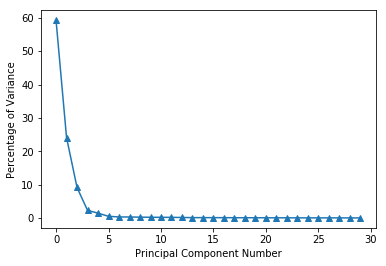

In [213]:
#选取重要的特征
cF()

In [214]:
#对上图的观察可知， 前6个特征是非常重要的，故而选取前6个特征
X = rNan()
lX, rX = pca(X, 6)
print lX
print rX

[[ 5183.89616507  3022.64772377  -688.38624272    57.92893142
   -349.28054496   -41.1987254 ]
 [ 1866.69728394  4021.63902468  1505.57352582   199.23992427
    640.23125989   -46.32552024]
 [ 3154.74165413  3461.98581552  1855.44207771  -153.33360802
    139.53362841   -29.23236202]
 ..., 
 [ 3821.21714302   157.30328822  1198.46485098   -15.13555733
   -479.52922352   -53.46157085]
 [ 4271.04023715  1300.47276359  -381.63452019   298.64738407
   -757.62307958   -51.07238061]
 [ 3562.87329382  3727.60719872   418.43547367   -35.86509797
    132.60920158   -16.28202608]]
[[  3.01066325e+03   2.49406731e+03   2.20213724e+03 ...,   1.67202673e-02
    5.36050927e-03   1.01506849e+02]
 [  3.01255070e+03   2.49352915e+03   2.20206516e+03 ...,   1.63462557e-02
    5.28251139e-03   9.73646175e+01]
 [  3.01275173e+03   2.49627540e+03   2.20235917e+03 ...,   1.64522016e-02
    5.31579865e-03   1.00869145e+02]
 ..., 
 [  3.01234748e+03   2.49961509e+03   2.20198193e+03 ...,   1.67269171e-02
    